In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5, palette='Set2')

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

%matplotlib inline

---

## Обобщенная линейная модель

Галапагосские острова &mdash; группа островов вулканического происхождения на востоке экваториальной части Тихого океана, в 972 км к западу от Эквадора, состоящая из 13 основных вулканических островов, 6 небольших островов и 107 скал и намывных территорий.

Острова известны прежде всего большим количеством местных видов фауны и проведённым здесь исследованием Чарлза Дарвина, которое послужило для него первым толчком к созданию эволюционной теории происхождения видов.

![image1.jpg](attachment:image1.jpg)

Загрузим датасет `galapagos.csv`, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` &mdash; наименование острова;
* `species` &mdash; количество наблюдаемых видов растений на острове;
* `endemics` &mdash; количество уникальных видов [*в задаче не рассматриваем*];
* `area` &mdash; площадь (км^2);
* `elevation` &mdash; высота (м);
* `nearest` &mdash; расстояние до ближайшего острова (км);
* `scruz` &mdash; расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` &mdash; площадь соседнего острова (км^2).

In [ ]:
galap = pd.read_csv("galapagos.csv", sep=";", index_col=0)
galap.head()

,species,endemics,area,elevation,nearest,scruz,adjacent
island,,,,,,,
Baltra,58,23,25.09,332,0.6,0.600000,1.840000
Bartolome,31,21,1.24,109,0.6,26.299999,572.330017
Caldwell,3,3,0.21,114,2.8,58.700001,0.780000
Champion,25,9,0.10,46,1.9,47.400002,0.180000
Coamano,2,1,1.05,130,1.9,1.900000,903.820007


Рассмотрим пуассоновскую регрессию. Какая ожидается зависимость `species` от остальных признаков?

*Т.к. речь о пуассоновской регрессии, то ожидаем экспоненциальную зависимость.*

Постройте графики зависимости `species` от всех признаков. При необходимости выполните нелинейные преобразования некоторых их них.

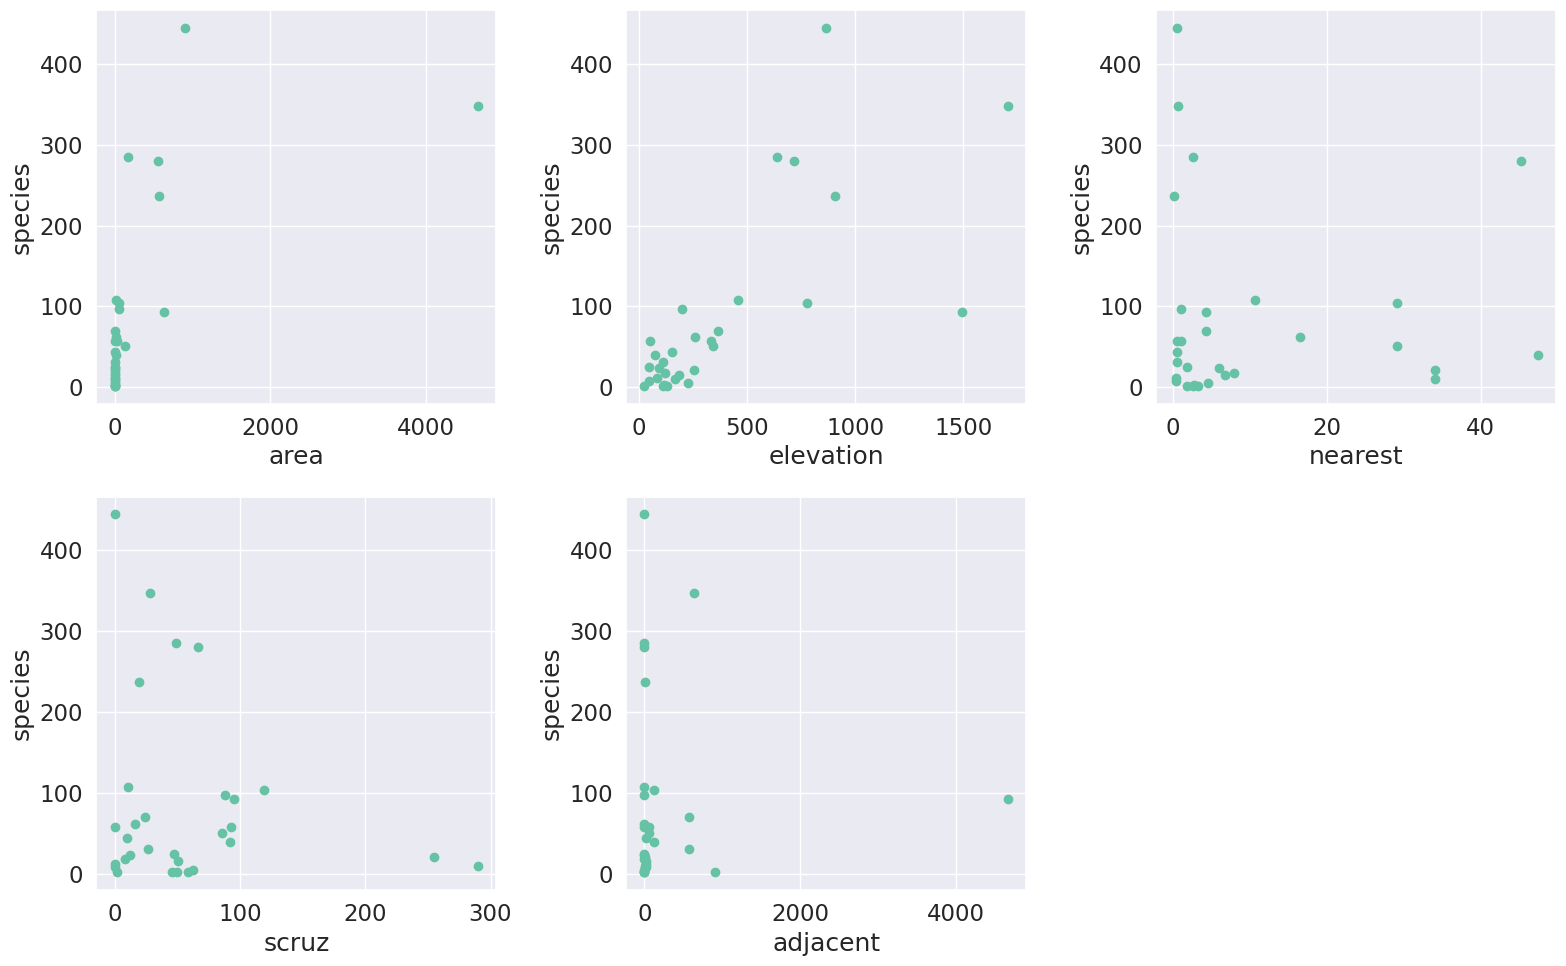

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(galap.columns[2:]):
    plt.subplot(2,3, i+1)
    plt.scatter(galap[col], galap["species"])
    plt.xlabel(col)
    plt.ylabel("species")
plt.tight_layout()
plt.show();

Попробуем прологорифмировать и посмотрим на результат

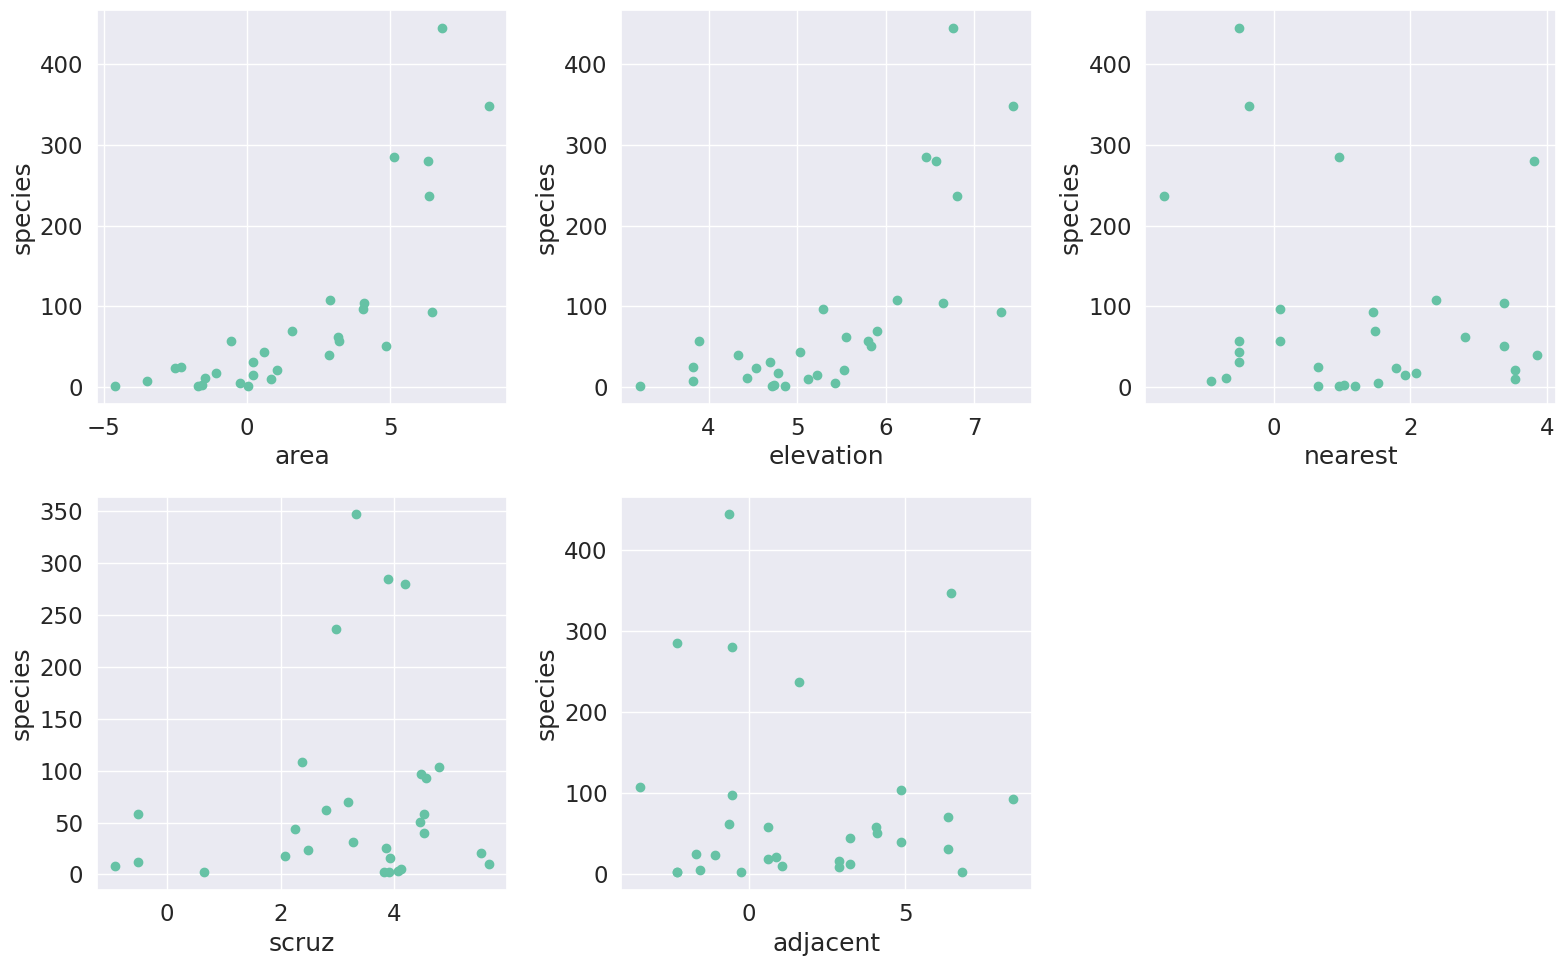

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(galap.columns[2:]):
    plt.subplot(2,3, i+1)
    plt.scatter(np.log(galap[col]), galap["species"])
    plt.xlabel(col)
    plt.ylabel("species")
plt.tight_layout()
plt.show()

Итого возьмем `log(area)`, `log(elevation)`, `nearest`, `scruz`, `log(adjacent)`

Обучим пуассоновскую регрессию по всем признакам.

In [ ]:
glm_model = smf.glm(
    "species ~ np.log(area) + np.log(elevation) + \
               nearest + scruz + np.log(adjacent)",
    galap,
    family=sm.families.Poisson()
)

glm_results = glm_model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.42
Date:                Sun, 24 Dec 2023   Deviance:                       366.00
Time:                        18:48:04   Pearson chi2:                     409.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3611      0.296     11.363      0.000       2.781       3.941
np.log(area)          0.3581      0.019     18.948      0.000       0.321       0.395
np.log(elevation)     0.0195      0.059      0.330      0.742      -0.097       0.136
nearest              -0.0020      0.002     -1.246      0.213      -0.005       0.001
scruz                -0.0025      0.001     -4.445      0.000      -0.004      -0.001
np.log(adjacent)     -0.0899      0.007    -13.709      0.000      -0.103      -0.077
=====================================================================================
"""

Оставим только значимые признаки, обучим модель еще раз и проинтерпретируем полученные результаты.

In [ ]:
glm_model = smf.glm(
    "species ~ np.log(area) + scruz + np.log(adjacent)",
    galap,
    family=sm.families.Poisson()
)

glm_results = glm_model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       26
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -264.40
Date:                Sun, 24 Dec 2023   Deviance:                       367.97
Time:                        18:48:04   Pearson chi2:                     413.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.4570      0.052     66.954      0.000       3.356       3.558
np.log(area)         0.3625      0.008     44.837      0.000       0.347       0.378
scruz               -0.0030      0.000     -6.200      0.000      -0.004      -0.002
np.log(adjacent)    -0.0874      0.006    -13.879      0.000      -0.100      -0.075
====================================================================================
"""

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения).

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитаем и напечатаем ковариационную матрицу оценок коэффициентов модели с помощью функции `cov_params`, рассмотрев тип оценки `HC3`.

In [ ]:
glm_robast_results = glm_model.fit(cov_type="HC3")
glm_robast_results.cov_params()

,Intercept,np.log(area),scruz,np.log(adjacent)
Intercept,0.032463,-0.004726,-0.000103,0.001714
np.log(area),-0.004726,0.000816,0.000010,-0.000390
scruz,-0.000103,0.000010,0.000002,-0.000005
np.log(adjacent),0.001714,-0.000390,-0.000005,0.000404


Напечатаем таблицу статистических свойств оценок коэффициентов и доверительные интервалы.

In [ ]:
glm_robast_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       26
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -264.40
Date:                Sun, 24 Dec 2023   Deviance:                       367.97
Time:                        18:48:05   Pearson chi2:                     413.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.4570      0.180     19.187      0.000       3.104       3.810
np.log(area)         0.3625      0.029     12.688      0.000       0.307       0.419
scruz               -0.0030      0.001     -2.413      0.016      -0.005      -0.001
np.log(adjacent)    -0.0874      0.020     -4.345      0.000      -0.127      -0.048
====================================================================================
"""

Придумаем на Галапагосском архипелаге еще один остров, зададим ему некоторые характеристики и назовем как-нибудь. Оценим, в каком интервале лежит ожидаемое количество видов растений на этом острове.

In [ ]:
galap.mean()

species       85.233333
endemics      26.500000
area         261.741995
elevation    368.400000
nearest       10.060000
scruz         56.976667
adjacent     261.098329
dtype: float64

In [ ]:
test = pd.DataFrame(
    {
        "area": [261],
        "elevation": [368],
        "nearest": [10],
        "scruz": [57],
        "adjacent" : [261]
    },
    index=["new"]
)
test

,area,elevation,nearest,scruz,adjacent
new,261,368,10,57,261


In [ ]:
confidence_interval = glm_robast_results.get_prediction(test).conf_int()
confidence_interval

array([[102.61555126, 149.36213447]])

Построим предсказательные интервалы для пуассоновских случайных величин, параметры которых соответствуют границам доверительного интервала, построенного на предыдущем шаге, и объеденим два интервала.

In [ ]:
left_interval = sps.poisson(mu=confidence_interval[0][0]).ppf([0.025, 0.975])
right_interval = sps.poisson(mu=confidence_interval[0][1]).ppf([0.025, 0.975])

predictive_interval = (
    min(left_interval[0], right_interval[0]),
    max(left_interval[1], right_interval[1])
)
predictive_interval

(83.0, 174.0)

---
---
---
---
---
---


Кардиотокография (КТГ) — непрерывная одновременная регистрация частоты сердечных сокращений плода и
тонуса матки с графическим изображением физиологических сигналов на калибровочной ленте. В настоящее
время КТГ является ведущим методом наблюдения за характером сердечной деятельности, который из-за
своей простоты в проведении, информативности и стабильности получаемой информации практически
полностью вытеснил из клинической практики фоно- и электрокардиографию плода.

Для облегчения задачи диагностики, результаты кардиотокографии некоторых эмбрионов были
классифицированы специалистами на нормальные и патологические. По показаниям приборов было
сгенерировано некоторое количество признаков.

**1.** Скачаем данные по ссылке: https://archive.ics.uci.edu/ml/datasets/cardiotocography.
Данные расположены в листе `Data`. Рассматриваемые нами признаки указаны в листе Description в колонке Features. Целевой меткой является столбец `NSP`. Для анализа мы не будем рассматривать данные, целевой меткой которой является `Suspect`.

In [ ]:
ctg = pd.read_excel("CTG.xls", "Data")
ctg = ctg[np.arange(1, 24)].iloc[:2127, :]
ctg.columns = ctg.iloc[0]
ctg = ctg.iloc[1:].astype(float)
ctg.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [ ]:
ctg = ctg.loc[ctg.NSP != 2]
ctg['NSP'] = ctg.NSP.map({1.:0, 3.:1})

**2.** Проведием визуальный анализ данных. Какие признаки лучше всего разделяют классы?

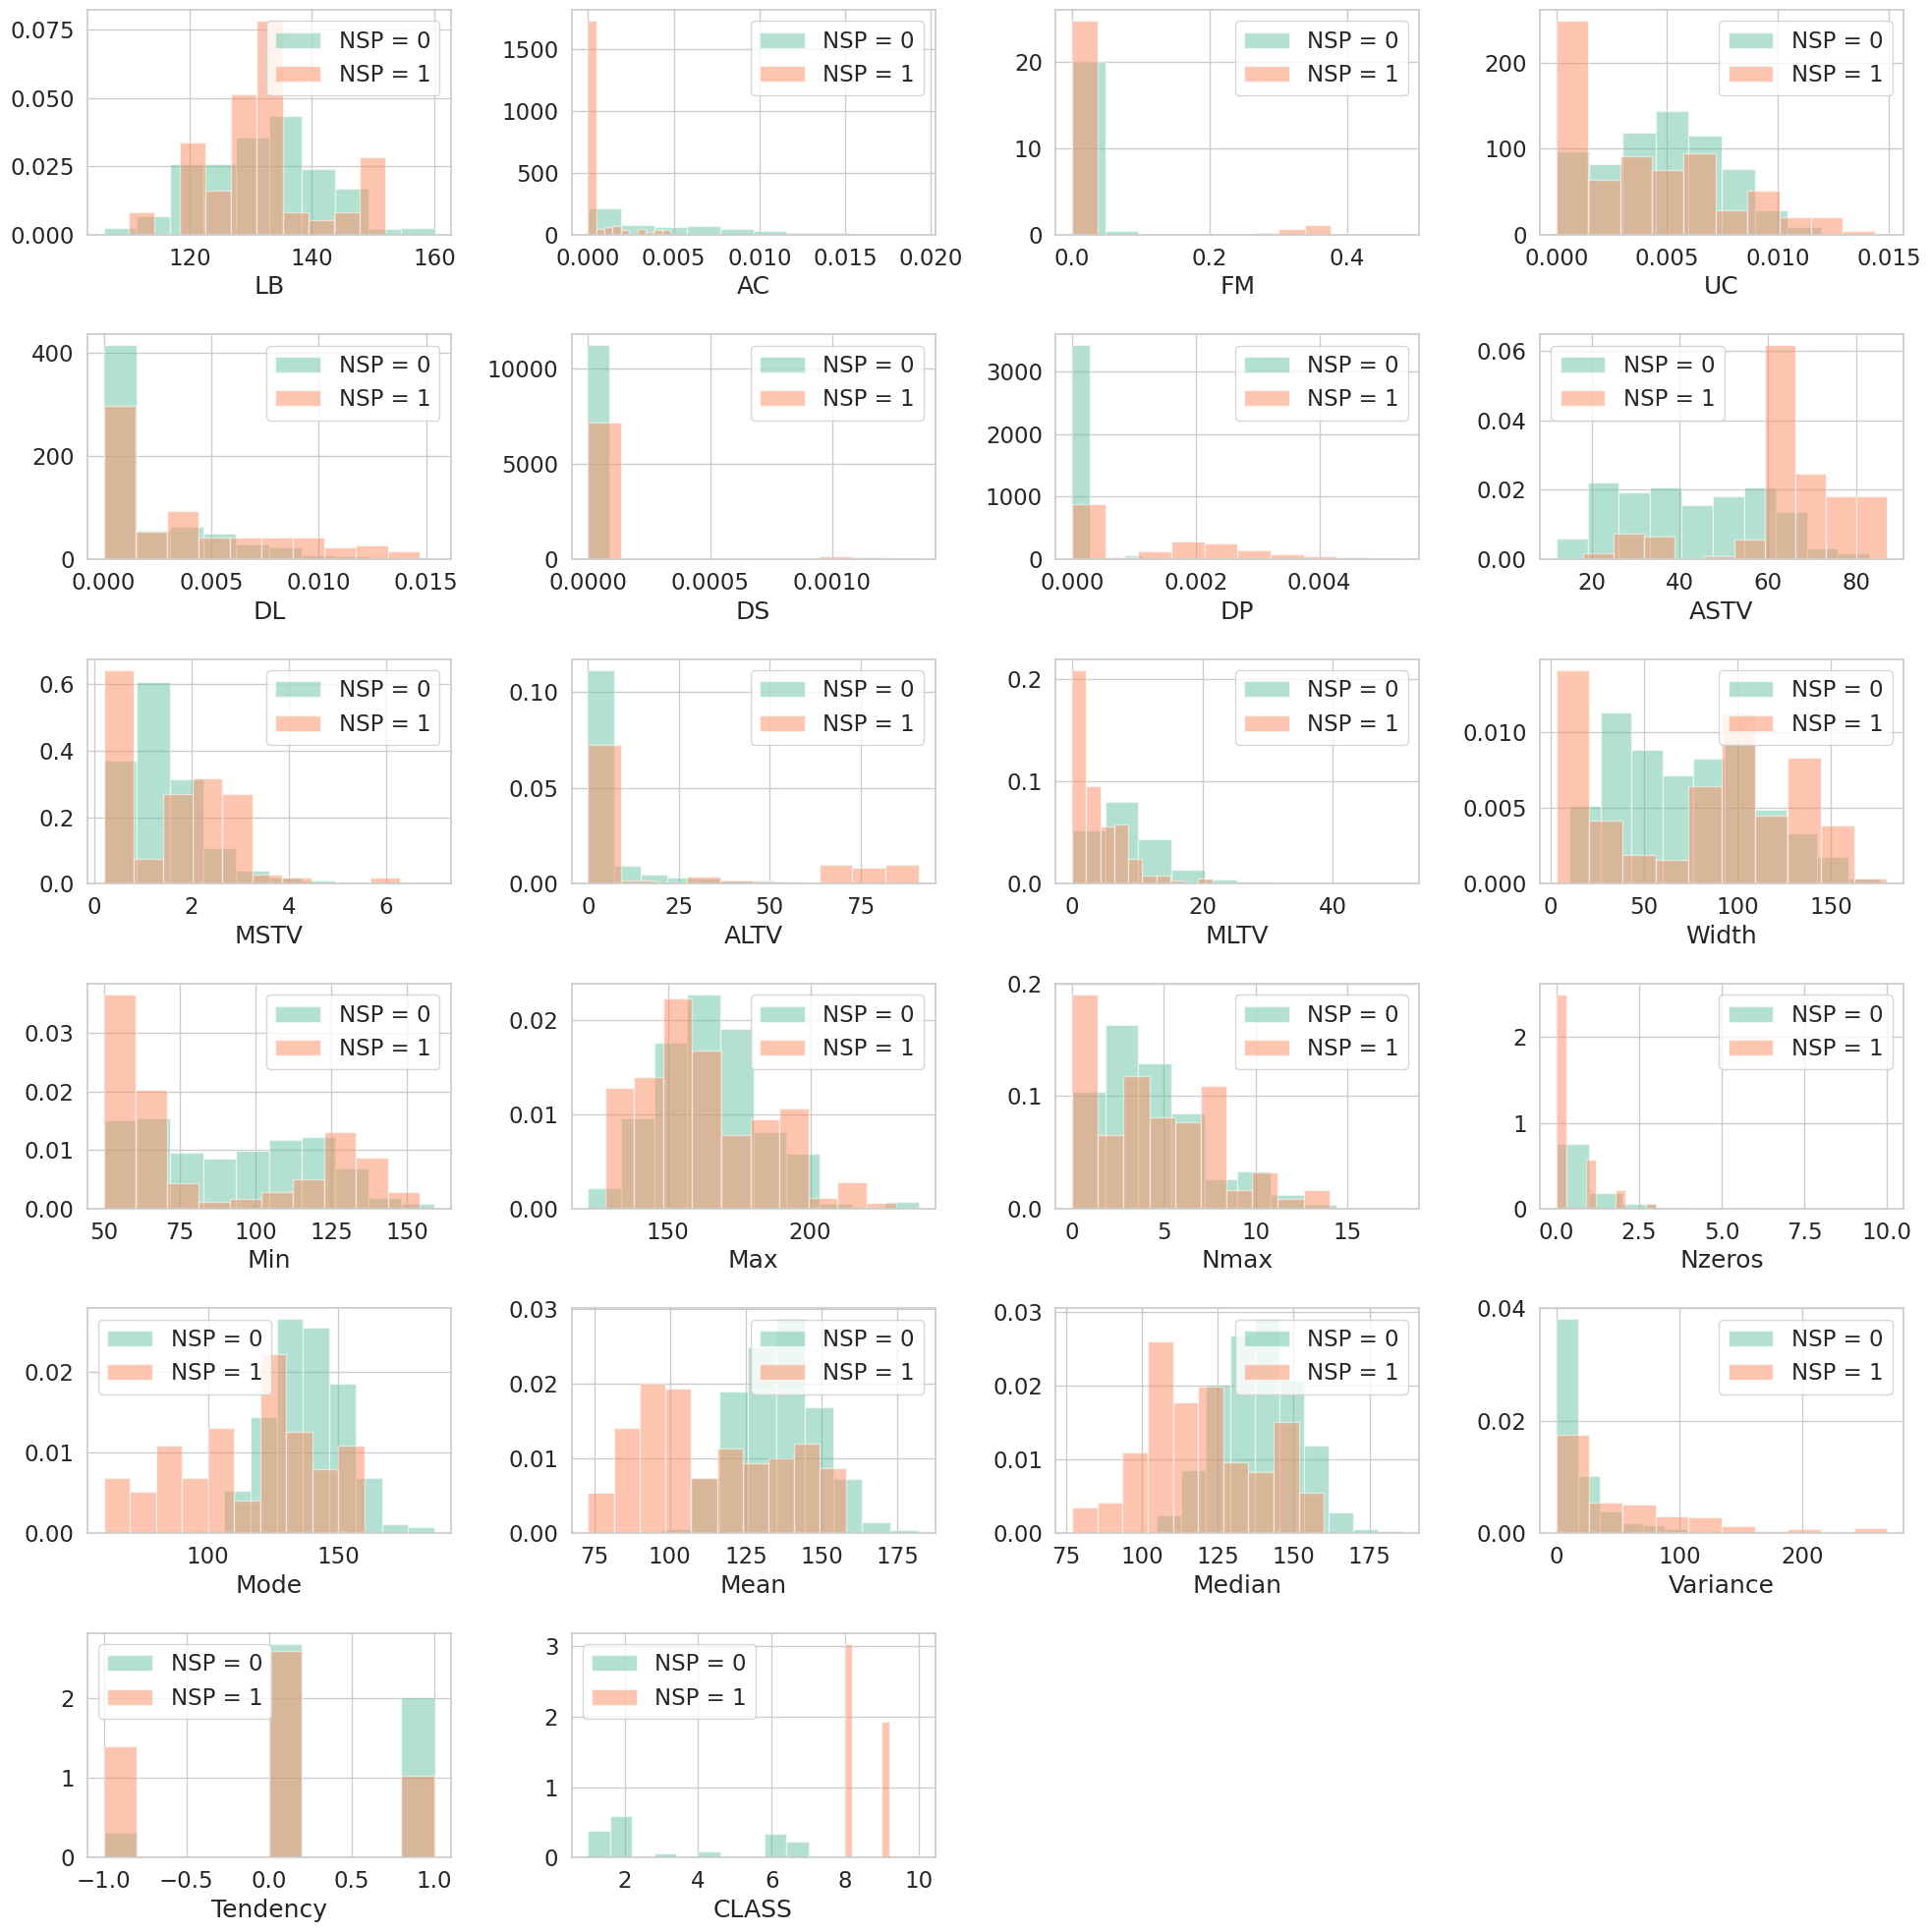

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(ctg.columns[:-1]):
        plt.subplot(6, 4, i+1)
        plt.hist(ctg[col][ctg.NSP==0], label="NSP = 0", density=True, alpha=0.5)
        plt.hist(ctg[col][ctg.NSP==1], label="NSP = 1", density=True, alpha=0.5)
        plt.legend()
        plt.xlabel(col)
    plt.tight_layout()
    plt.show();

**3.** Разделим выборку на обучающую и тестовую часть случайным образом в соотношении 4:1.

In [ ]:
train, test = train_test_split(ctg, test_size=0.2, random_state=19)

**4.** Обучим логистическую регрессию по всем признакам. Напечатайте `summary` модели.

In [ ]:
all_params = " + ".join(ctg.columns.difference(["NSP"]))
glm_model = smf.glm(
    "NSP ~ " + all_params, train, family=sm.families.Binomial()
)

glm_results = glm_model.fit()

/home/nikita/venv_main/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/nikita/venv_main/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/nikita/venv_main/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/nikita/venv_main/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnin

В чем причины такого поведения модели? Какие выводы можно сделать? Что нужно сделать, чтобы это исправить?

По признаку `CLASS` однозначно можно определить `NSP`. Можем убедиться в этом

In [ ]:
pd.crosstab(index=train['NSP'], columns=train['CLASS'])

CLASS,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
NSP,,,,,,,,,,
0,300,476,41,67,2,267,175,0,0,0
1,0,0,0,0,0,0,0,80,55,1


Внимательно почитав описание данных можем заметить, что возможна классификация на 3 и на 10 классов, за что отвечают переменные `NSP` и `CLASS` соответственно. То есть мы подсунули метку класса в качестве признаков, надо сразу внимательно читать описание данных... :)

In [ ]:
all_params = "+".join(ctg.columns.difference(["NSP", "CLASS"]))
glm_model = smf.glm(
    "NSP ~ " + all_params, train, family=sm.families.Binomial()
)

glm_results = glm_model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1443
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.772
Date:                Sun, 24 Dec 2023   Deviance:                       87.545
Time:                        18:48:09   Pearson chi2:                     198.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4280
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.8059      8.865     -3.362      0.001     -47.182     -12.430
AC          -121.3737    481.548     -0.252      0.801   -1065.190     822.442
ALTV           0.1249      0.027      4.677      0.000       0.073       0.177
ASTV           0.2177      0.044      4.971      0.000       0.132       0.304
DL            86.7515    191.096      0.454      0.650    -287.790     461.293
DP          2807.4181    895.666      3.134      0.002    1051.944    4562.892
DS          3994.1773   1.09e+07      0.000      1.000   -2.13e+07    2.13e+07
FM            21.1472      8.521      2.482      0.013       4.446      37.848
LB             0.5844      0.149      3.919      0.000       0.292       0.877
MLTV           0.1253      0.140      0.894      0.371      -0.149       0.400
MSTV          -2.8958      1.263     -2.292      0.022      -5.372      -0.420
Max            0.0824      0.057      1.436      0.151      -0.030       0.195
Mean          -0.1153      0.083     -1.389      0.165      -0.278       0.047
Median        -0.4040      0.124     -3.248      0.001      -0.648      -0.160
Min            0.0516      0.057      0.910      0.363      -0.059       0.163
Mode          -0.1168      0.073     -1.600      0.110      -0.260       0.026
Nmax          -0.5452      0.246     -2.217      0.027      -1.027      -0.063
Nzeros         1.1417      0.402      2.841      0.005       0.354       1.929
Tendency       2.8511      0.955      2.984      0.003       0.979       4.724
UC          -656.6931    151.851     -4.325      0.000    -954.316    -359.071
Variance       0.0761      0.019      3.921      0.000       0.038       0.114
Width          0.0307      0.053      0.579      0.563      -0.073       0.135
==============================================================================
"""

**5.** Проверим модель на линейность по значимым признакам, используя сглаженные диаграммы рассеивания. Для избежания влияния выбросов будем строить диаграммы в интервале от 0.05-квантили до 0.95-квантили по значениям каждого признака. В качестве ширины ядра возьмем треть этого диапазона.

In [ ]:
pvalues = glm_results.pvalues
important_features = pvalues[pvalues <= 0.05].index[1:]
important_features

Index(['ALTV', 'ASTV', 'DP', 'FM', 'LB', 'MSTV', 'Median', 'Nmax', 'Nzeros',
       'Tendency', 'UC', 'Variance'],
      dtype='object')

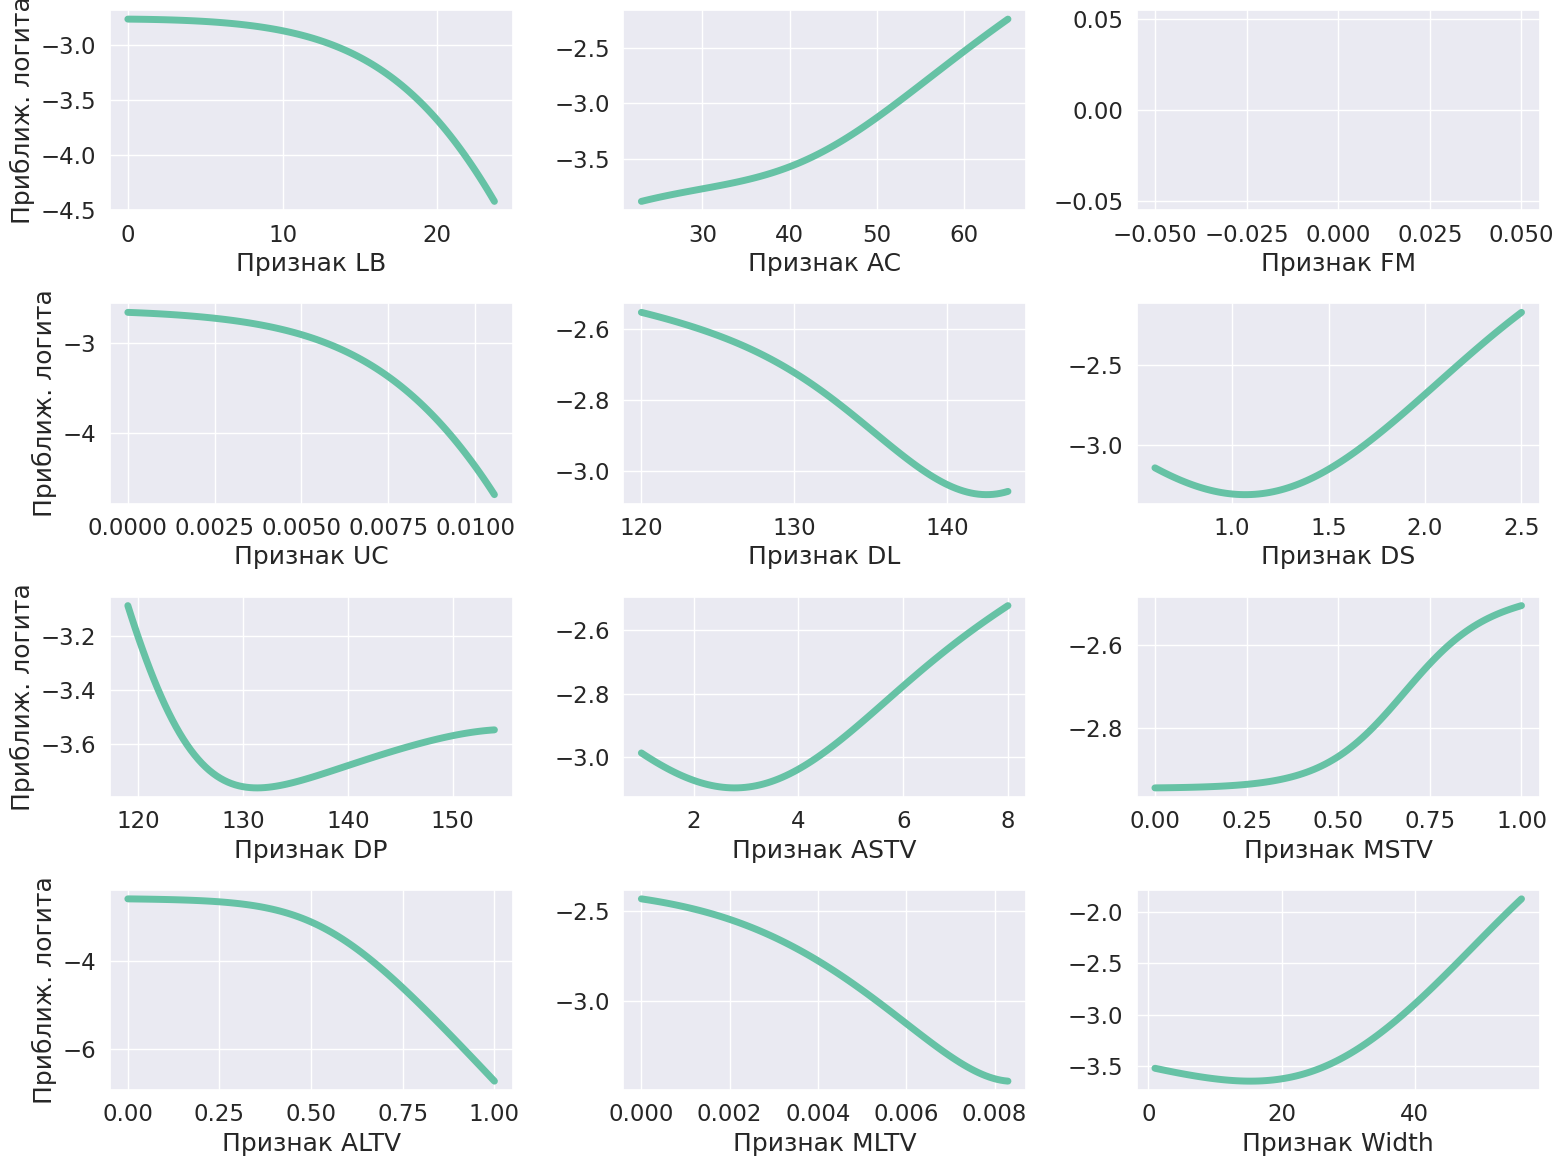

In [ ]:
size = 100 # размер сетки

X = train[important_features].values
y = train["NSP"].values

plt.figure(figsize=(16, 12))
# цикл по признакам
for feature_idx in range(X.shape[1]):
    # отсортированная сетка по признаку feature_idx
    # для построения ядерной оценки
    x_grid = np.linspace(
        np.percentile(X[:, feature_idx], 10),
        np.percentile(X[:, feature_idx], 90),
        size
    )
    h = (np.percentile(X[:, feature_idx], 90) - \
         np.percentile(X[:, feature_idx], 10)) / 3.
    # гауссовское ядро с шириной h
    kernel = sps.norm(scale=h)
    # значения ядра в точках выборки
    kernel_values = kernel.pdf(
        X[:size, feature_idx][:size, np.newaxis] - x_grid[np.newaxis, :]
    )
    # оценка по ядерной регрессии для признака feature_idx
    y_est = (y[:size, np.newaxis] * kernel_values).sum(axis=0) \
            / kernel_values.sum(axis=0)
    # приближение логита по оценкам y_est
    l_sm = np.log(y_est / (1 - y_est))

    # отрисуем графики
    plt.subplot(4, 3, feature_idx + 1)
    plt.plot(x_grid, l_sm, lw=5)
    plt.xlabel(f'Признак {ctg.columns[feature_idx]}')
    if feature_idx%3 == 0:
        plt.ylabel('Приближ. логита')

plt.tight_layout()
plt.show()

**6.** Можно ли для каких-то из признаков, по которым не подтвердилась линейность модели, добиться линейности с помощью преобразований?
- В качестве преобразований можно использовать логарифмирование, возведение в квадрат, взятие модуля, сдвиг, введение нескольких признаков и т.д..

In [ ]:
glm_model = smf.glm(
    "NSP ~ np.sqrt(LB)+AC+np.power(FM,2)+UC+np.power(DL,2)+\
           np.sqrt(DS)+np.power(DP,2)+np.sqrt(ASTV)+\
           MSTV+np.power(ALTV,2)+MLTV",
    train,
    family=sm.families.Binomial()
)
glm_results = glm_model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1452
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82.619
Date:                Sun, 24 Dec 2023   Deviance:                       165.24
Time:                        18:48:11   Pearson chi2:                 3.02e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -33.1048      8.035     -4.120      0.000     -48.854     -17.356
np.sqrt(LB)           0.6221      0.546      1.139      0.255      -0.448       1.692
AC                 -561.0353    221.721     -2.530      0.011    -995.601    -126.470
np.power(FM, 2)      42.3576      9.124      4.642      0.000      24.474      60.241
UC                 -350.0923     81.776     -4.281      0.000    -510.370    -189.814
np.power(DL, 2)    4.837e+04   7952.976      6.082      0.000    3.28e+04     6.4e+04
np.sqrt(DS)         604.4165   4.24e+05      0.001      0.999    -8.3e+05    8.31e+05
np.power(DP, 2)    2.186e+06   2.81e+05      7.768      0.000    1.63e+06    2.74e+06
np.sqrt(ASTV)         2.7731      0.389      7.124      0.000       2.010       3.536
MSTV                  0.0707      0.302      0.234      0.815      -0.521       0.662
np.power(ALTV, 2)     0.0009      0.000      6.050      0.000       0.001       0.001
MLTV                  0.0997      0.053      1.885      0.059      -0.004       0.203
=====================================================================================
"""

**7.** Оставим только значимые и преобразованные признаки, обучим модель еще раз

In [ ]:
glm_model = smf.glm(
    "NSP ~ AC+np.power(FM,2)+UC+np.power(DL,2)+\
           np.power(DP,2)+np.sqrt(ASTV)+np.power(ALTV,2)",
    train,
    family=sm.families.Binomial()
)
glm_results = glm_model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1456
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.963
Date:                Sun, 24 Dec 2023   Deviance:                       169.93
Time:                        18:48:11   Pearson chi2:                 5.14e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -23.6740      3.084     -7.677      0.000     -29.718     -17.630
AC                 -632.7320    221.012     -2.863      0.004   -1065.908    -199.556
np.power(FM, 2)      42.1795      9.191      4.589      0.000      24.165      60.194
UC                 -400.1249     78.605     -5.090      0.000    -554.188    -246.062
np.power(DL, 2)    4.522e+04   6437.621      7.024      0.000    3.26e+04    5.78e+04
np.power(DP, 2)     2.02e+06   2.38e+05      8.479      0.000    1.55e+06    2.49e+06
np.sqrt(ASTV)         2.6419      0.362      7.293      0.000       1.932       3.352
np.power(ALTV, 2)     0.0008      0.000      6.134      0.000       0.001       0.001
=====================================================================================
"""

**8.** Для некоторых объектов из тестовой выборки оценим вероятность наличия патологии. Постройте также доверительный интервал уровня доверия 0.95 для этой вероятности.

In [ ]:
sub_test = test.sample(20)
res_int = glm_results.get_prediction(sub_test).conf_int()

pd.DataFrame({
    "true": sub_test.NSP,
    "left": res_int[:, 0],
    "right": res_int[:, 1]
}).round(5)

,true,left,right
1173,0,0.00000,0.00003
1473,0,0.00000,0.00009
1658,0,0.00088,0.01237
2091,0,0.22985,0.51297
1224,0,0.00000,0.00010
1198,0,0.00005,0.00138
34,0,0.00000,0.00003
1788,0,0.00004,0.00547
556,0,0.00000,0.00002
353,1,0.98239,0.99953
